In [ ]:
# Installation of PyTorch
!pip install torch torchvision


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np


torch.manual_seed(999)

# Generator network
class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()
        self.fc1 = nn.Linear(100, 256)
        self.fc2 = nn.Linear(256, 512)
        self.fc3 = nn.Linear(512, 1024)
        self.fc4 = nn.Linear(1024, 28*28)
        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, z):
        x = self.relu(self.fc1(z))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        x = self.tanh(x)
        return x.view(-1, 1, 28, 28)

# Discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        self.fc1 = nn.Linear(28*28, 1024)
        self.fc2 = nn.Linear(1class Generator(tf.Module):
    def __init__(self):
        super(Generator, self).__init__()


        # layers of Convolutional neural network (CNN)
        self.dense1 = tf.Variable(tf.random.normal([100, 7*7*256]))
        self.dense1_bias = tf.Variable(tf.zeros([7*7*256]))
        self.conv1_weights = tf.Variable(tf.random.normal([5, 5, 128, 256]))
        self.conv1_bias = tf.Variable(tf.zeros([128]))
        self.conv2_weights = tf.Variable(tf.random.normal([5, 5, 64, 128]))
        self.conv2_bias = tf.Variable(tf.zeros([64]))
        self.conv3_weights = tf.Variable(tf.random.normal([5, 5, 1, 64]))
        self.conv3_bias = tf.Variable(tf.zeros([1]))

    def __call__(self, x):
        #use activation function
        x = tf.matmul(x, sel Training Loop
num_epochs = 4
real_label = 1
fake_label = 0

for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(train_loader):

        # Create labels for real and fake images
        real_imgs = imgs
        batch_size = real_imgs.size(0)

        # Discriminator: Train on real images
        optimizer_d.zero_grad()
        labels = torch.ones(batch_size, 1) * real_label
        output = discriminator(real_imgs)
        loss_d_real = criterion(output, labels)
        loss_d_real.backward()

        # Discriminator: Train on fake images generated by the generator
        noise = torch.randn(batch_size, 100)
        fake_imgs = generator(noise)
        labels.fill_(fake_label)
        output = discriminator(fake_imgs.detach())  # Detach to avoid backprop through generator
        loss_d_fake = criterion(output, labels)
        loss_d_fake.backward()

        optimizer_d.step()

        # Generator: Train to fool the discriminator
        optimizerf.dense1) + self.dense1_bias
        x = tf.nn.leaky_relu(x)
        x = tf.reshape(x, [-1, 7, 7, 256])
        self.fc3 = nn.Linear(512, 256)
        self.fc4 = nn.Linear(256, 1)
        self.leaky_relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = self.leaky_relu(self.fc1(x))
        x = self.leaky_relu(self.fc2(x))
        x = self.leaky_relu(self.fc3(x))
        x = self.fc4(x)
        x = self.sigmoid(x)  # Output value between 0 and 1
        return x


In [ ]:
# Convert image to tensor
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Normalize to [-1, 1]
])

# Load MNIST data
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('.', train=True, download=True, transform=transform),
    batch_size=64, shuffle=True
)


In [ ]:
# Initialize the generator and discriminator
generator = Generator()
discriminator = Discriminator()

# Loss function (Binary Cross Entropy)
criterion = nn.BCELoss()

# Optimizers
lr = 0.0002
beta1 = 0.5
optimizer_g = optim.Adam(generator.parameters(), lr=lr, betas=(beta1, 0.999))
optimizer_d = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, 0.999))


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Training Loop
num_epochs = 4
real_label = 1
fake_label = 0

for epoch in range(num_epochs):
    for i, (imgs, _) in enumerate(train_loader):


        real_imgs = imgs
        batch_size = real_imgs.size(0)

        # Discriminator: Train on real images
        optimizer_d.zero_grad()
        labels = torch.ones(batch_size, 1) * real_label
        output = discriminator(real_imgs)
        loss_d_real = criterion(output, labels)
        loss_d_real.backward()

        # Discriminator: Train on fake images generated by the generator
        noise = torch.randn(batch_size, 100)
        fake_imgs = generator(noise)
        labels.fill_(fake_label)
        output = discriminator(fake_imgs.detach())
        loss_d_fake = criterion(output, labels)
        loss_d_fake.backward()

        optimizer_d.step()
        optimizer_g.zero_grad()
        labels.fill_(real_label)
        output = discriminator(fake_imgs)
        loss_g = criterion(output, labels)
        loss_g.backward()

        optimizer_g.step()

    # Print the losses
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss D: {loss_d_real.item() + loss_d_fake.item()}, Loss G: {loss_g.item()}")

    # Save a batch of generated images every few epochs
    if (epoch + 1) % 5 == 0:
        with torch.no_grad():
            fake_images = generator(torch.randn(64, 100))
            fake_images = fake_images * 0.5 + 0.5  # Rescale images back to [0, 1]
            grid = torchvision.utils.make_grid(fake_images, nrow=8, normalize=True)
            plt.figure(figsize=(8,8))
            plt.imshow(np.transpose(grid.cpu(), (1, 2, 0)))
            plt.show()


Epoch [1/4], Loss D: 0.2680075466632843, Loss G: 2.6521737575531006
Epoch [2/4], Loss D: 0.7056734412908554, Loss G: 1.2751059532165527
Epoch [3/4], Loss D: 0.6964215636253357, Loss G: 1.9808940887451172
Epoch [4/4], Loss D: 0.8699931502342224, Loss G: 1.7792571783065796


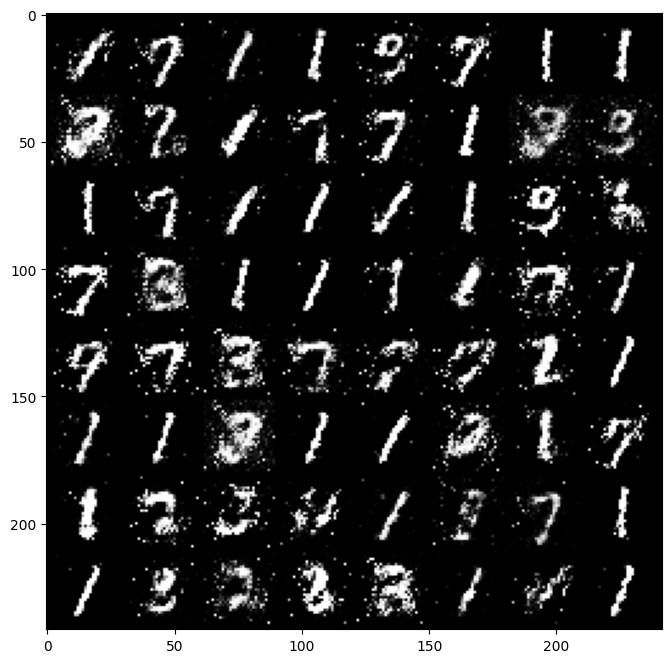

In [ ]:
#Generated images from Genrator
import torchvision
import torch
import matplotlib.pyplot as plt
import numpy as np

noise = torch.randn(64, 100)
fake_images = generator(noise)
fake_images = fake_images * 0.5 + 0.5


grid = torchvision.utils.make_grid(fake_images, nrow=8, normalize=True)
plt.figure(figsize=(8, 8))
plt.imshow(np.transpose(grid.cpu(), (1, 2, 0)))
plt.show()
